# Exploring Dandiset 001333: Parkinson's Electrophysiological Signal Dataset (PESD)

> **⚠️ AI-Generated Content Warning:** This notebook was generated by an AI assistant and has not been fully verified. Please be cautious when interpreting the code or results and validate findings independently.

## Overview

This notebook explores [Dandiset 001333: Parkinson's Electrophysiological Signal Dataset (PESD)](https://dandiarchive.org/dandiset/001333/0.250327.2220), a collection of electrophysiological signals from both healthy and parkinsonian subjects. 

According to the dataset description, this Dandiset contains simulated electrophysiological signals that show the characteristic differences between healthy and parkinsonian neural activity. Specifically, parkinsonian signals typically show a relatively high power density in the beta frequency range (13 to 30 Hz) in the subthalamic nucleus (STN), which is used as a pathological biomarker for Parkinson's Disease (PD) symptoms.

The dataset includes two types of signals:
1. **Beta Average Rectified Voltage (ARV)**: Frequency domain signals determined by calculating the Average Rectified Value of the beta band
2. **Local Field Potential (LFP)**: Time domain signals from the Subthalamic Nucleus (STN) derived from synchronized neural activity

## Required Packages

In [1]:
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import seaborn as sns
sns.set_theme()

## Loading the Dandiset

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001333", "0.250327.2220")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

Dandiset name: Parkinson's Electrophysiological Signal Dataset (PESD)
Dandiset URL: https://dandiarchive.org/dandiset/001333/0.250327.2220


## Dataset Structure

In [3]:
# List some assets in the Dandiset to understand the structure
assets = dandiset.get_assets()
subject_types = set()

for asset in islice(assets, 10):  # Just showing the first 10 for brevity
    subject_type = asset.path.split('/')[0]
    subject_types.add(subject_type)
    print(f"- {asset.path} (ID: {asset.identifier})")

print(f"\nSubject types in dataset: {sorted(list(subject_types))}")

- sub-healthy-simulated-data/sub-healthy-simulated-data_ses-001_ecephys.nwb (ID: 5409700b-e080-44e6-a6db-1d3e8890cd6c)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-218_ecephys.nwb (ID: da77917e-655c-4eeb-a0a6-7529a8a35901)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-279_ecephys.nwb (ID: aa743a96-e79b-40b1-a0df-55ef3460e856)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-423_ecephys.nwb (ID: 068afe41-3b8e-402f-91d4-9f297df677a2)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-162_ecephys.nwb (ID: b344c8b7-422f-46bb-b016-b47dc1e87c65)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-345_ecephys.nwb (ID: d0e8beef-ee7a-44a9-bebc-e0865b4c8f42)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-452_ecephys.nwb (ID: 1800fb0a-1e60-459f-9631-878fbc7438ed)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-516_ecephys.nwb (ID: 4f2100fa-9767-4612-9914-8cf7195e4421)
- sub-healthy-simulated-beta/sub-healthy-simulat

The dataset is organized by subject type and session, with separate files for different data types:

- `sub-healthy-simulated-beta`: Contains Beta ARV data from healthy subjects
- `sub-healthy-simulated-lfp`: Contains LFP data from healthy subjects
- `sub-parkinson-simulated-beta`: Contains Beta ARV data from parkinsonian subjects
- `sub-parkinson-simulated-lfp`: Contains LFP data from parkinsonian subjects
- `sub-healthy-simulated-data`: Contains additional simulated data

Each file is in the Neurodata Without Borders (NWB) format, which provides a standardized way to store neurophysiology data.

## Exploring a Sample NWB File

Let's load one of the NWB files to understand its structure. We'll use a healthy LFP file:

In [4]:
# Load a sample healthy LFP file
healthy_lfp_url = "https://api.dandiarchive.org/api/assets/00df5264-001b-4bb0-a987-0ddfb6058961/download/"
remote_file = remfile.File(healthy_lfp_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### NWB File Metadata

In [5]:
# Display basic metadata from the NWB file
print(f"Session description: {nwb.session_description}")
print(f"Experiment description: {nwb.experiment_description[:300]}...")  # Truncate for readability
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Keywords: {nwb.keywords[:]}")
print(f"Related publications: {nwb.related_publications}")
print(f"Lab: {nwb.lab}")
print(f"Institution: {nwb.institution}")

Session description: Parkinson's Electrophysiological Signal Dataset (PESD) Generated from Simulation
Experiment description: The PESD dataset is generated from a cortico-basal-ganglia network for a Parkinsonian computational model. The computational model of the cortico-basal-ganglia is originally presented by Fleming et al. in the article: 'Simulation of Closed-Loop Deep Brain Stimulation Control Schemes for Suppression ...
Subject ID: healthy-simulated-lfp
Keywords: ['ecephys' 'LFP' "Parkinson's Disease" 'Beta Band']
Related publications: ('https://arxiv.org/abs/2407.17756', 'DOI: 10.3389/fnins.2020.00166')
Lab: BrainX Lab
Institution: Michigan Technological University


### Electrode Information

In [6]:
# Explore electrode information
electrode_df = nwb.electrodes.to_dataframe()
print("Electrode information:")
print(electrode_df)

Electrode information:
                                            location  \
id                                                     
0   Simulated Cortico-basal-ganglia network of brain   
1   Simulated Cortico-basal-ganglia network of brain   
2   Simulated Cortico-basal-ganglia network of brain   
3   Simulated Cortico-basal-ganglia network of brain   
4   Simulated Cortico-basal-ganglia network of brain   
5   Simulated Cortico-basal-ganglia network of brain   
6   Simulated Cortico-basal-ganglia network of brain   
7   Simulated Cortico-basal-ganglia network of brain   
8   Simulated Cortico-basal-ganglia network of brain   
9   Simulated Cortico-basal-ganglia network of brain   
10  Simulated Cortico-basal-ganglia network of brain   
11  Simulated Cortico-basal-ganglia network of brain   

                                                group group_name         label  
id                                                                              
0   shank0 pynwb.ecephys.Elect

### Electrode Groups

In [7]:
# Explore electrode groups
print("\nElectrode Groups:")
for name, group in nwb.electrode_groups.items():
    print(f"Group: {name}")
    print(f"  Description: {group.description}")
    print(f"  Location: {group.location}")


Electrode Groups:
Group: shank0
  Description: Simulated electrode group for shank 0
  Location: Simulated Cortico-basal-ganglia network of brain
Group: shank1
  Description: Simulated electrode group for shank 1
  Location: Simulated Cortico-basal-ganglia network of brain
Group: shank2
  Description: Simulated electrode group for shank 2
  Location: Simulated Cortico-basal-ganglia network of brain
Group: shank3
  Description: Simulated electrode group for shank 3
  Location: Simulated Cortico-basal-ganglia network of brain


The recording setup consists of 4 shanks (shank0 through shank3), each with 3 electrodes, for a total of 12 recording sites. All electrodes are placed within a simulated Cortico-basal-ganglia network.

## Exploring LFP Data

Now let's examine the LFP data in the file:

In [8]:
# Get LFP data
lfp = nwb.processing["ecephys"]["LFP"]["LFP"]

# Print information about the LFP data
print(f"Signal unit: {lfp.unit}")
print(f"Sampling rate: {lfp.rate} Hz")
print(f"Data shape: {lfp.data.shape}")
print(f"Duration: {lfp.data.shape[0] / lfp.rate} seconds")

Signal unit: volts
Sampling rate: 2000.0 Hz
Data shape: (77400,)
Duration: 38.7 seconds


### Visualizing LFP Data

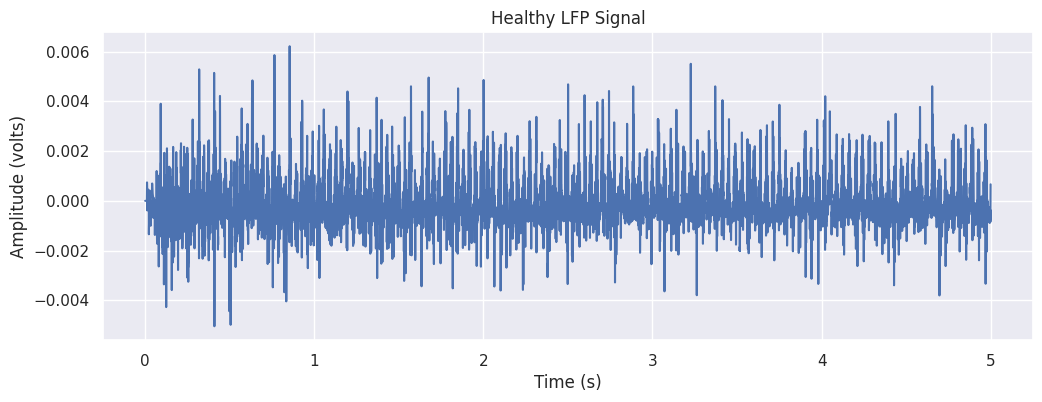

In [9]:
# Plot a sample of the LFP data (first 10000 points, ~5 seconds)
sample_size = 10000
time_axis = np.arange(sample_size) / lfp.rate

plt.figure(figsize=(12, 4))
plt.plot(time_axis, lfp.data[0:sample_size])
plt.title('Healthy LFP Signal')
plt.xlabel('Time (s)')
plt.ylabel(f'Amplitude ({lfp.unit})')
plt.grid(True)
plt.show()

### Computing and Visualizing Power Spectrum

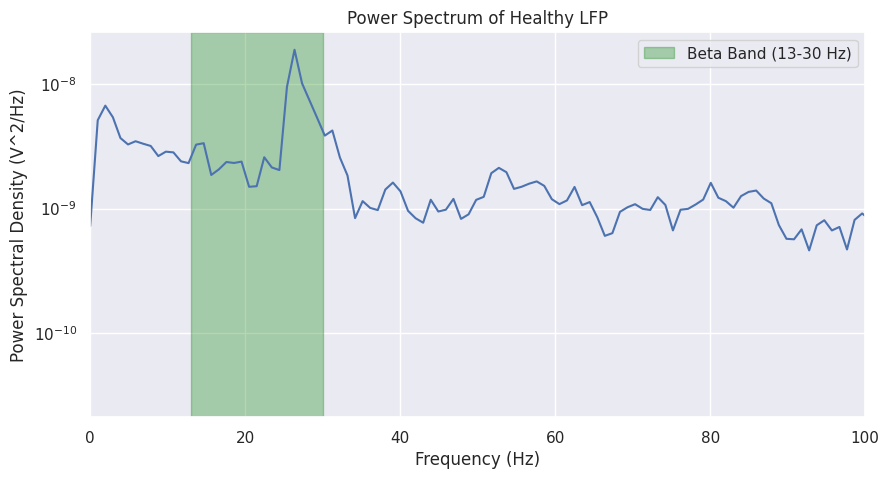

In [10]:
# Compute power spectrum using Welch's method
def compute_psd(data, fs):
    f, pxx = signal.welch(data, fs, nperseg=2048)
    return f, pxx

# Use first 30000 points for spectral analysis
f, pxx = compute_psd(lfp.data[0:30000], lfp.rate)

# Plot power spectrum
plt.figure(figsize=(10, 5))
plt.semilogy(f, pxx)
plt.title('Power Spectrum of Healthy LFP')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (V^2/Hz)')
plt.xlim(0, 100)  # Limit to 100 Hz for better visualization

# Highlight beta band (13-30 Hz)
plt.axvspan(13, 30, alpha=0.3, color='green', label='Beta Band (13-30 Hz)')
plt.legend()
plt.grid(True)
plt.show()

## Comparing Healthy and Parkinsonian Data

Now let's load a parkinsonian LFP file and compare it with the healthy data:

In [11]:
# Load a parkinsonian LFP file
parkinsonian_lfp_url = "https://api.dandiarchive.org/api/assets/5535e23a-9029-43c5-80fb-0fb596541a81/download/"
parkinsonian_remote_file = remfile.File(parkinsonian_lfp_url)
parkinsonian_h5_file = h5py.File(parkinsonian_remote_file)
parkinsonian_io = pynwb.NWBHDF5IO(file=parkinsonian_h5_file)
parkinsonian_nwb = parkinsonian_io.read()

# Access the LFP data
parkinsonian_lfp = parkinsonian_nwb.processing["ecephys"]["LFP"]["LFP"]

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### Comparing LFP Signals

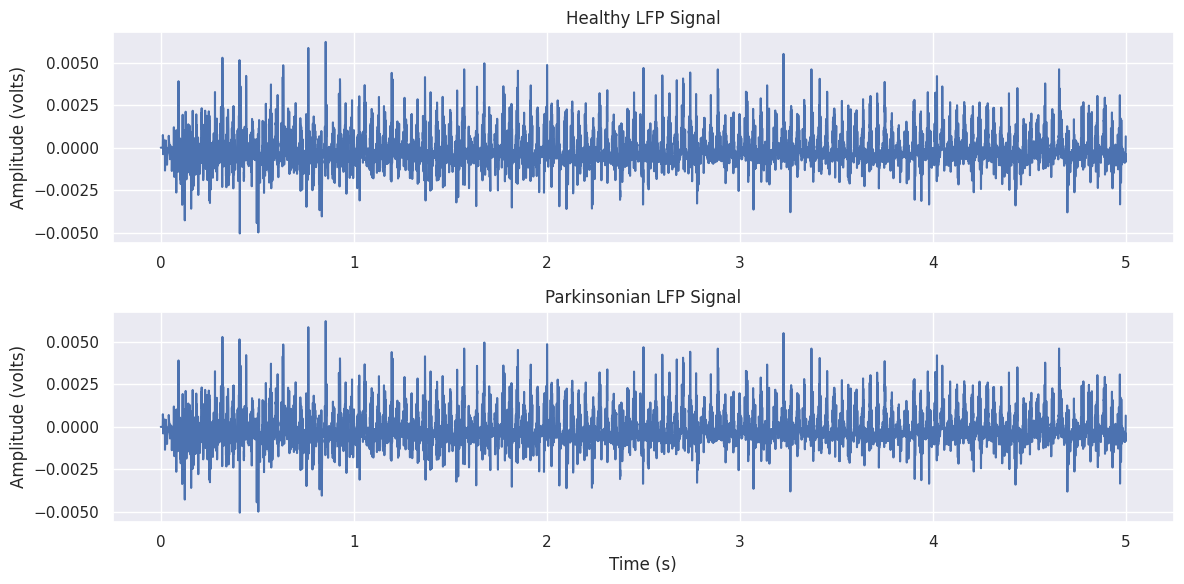

In [12]:
# Plot both healthy and parkinsonian LFP data (first 10000 points)
time_axis = np.arange(sample_size) / lfp.rate

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time_axis, lfp.data[0:sample_size])
plt.title('Healthy LFP Signal')
plt.ylabel(f'Amplitude ({lfp.unit})')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(time_axis, parkinsonian_lfp.data[0:sample_size])
plt.title('Parkinsonian LFP Signal')
plt.xlabel('Time (s)')
plt.ylabel(f'Amplitude ({lfp.unit})')
plt.grid(True)

plt.tight_layout()
plt.show()

### Comparing Power Spectra

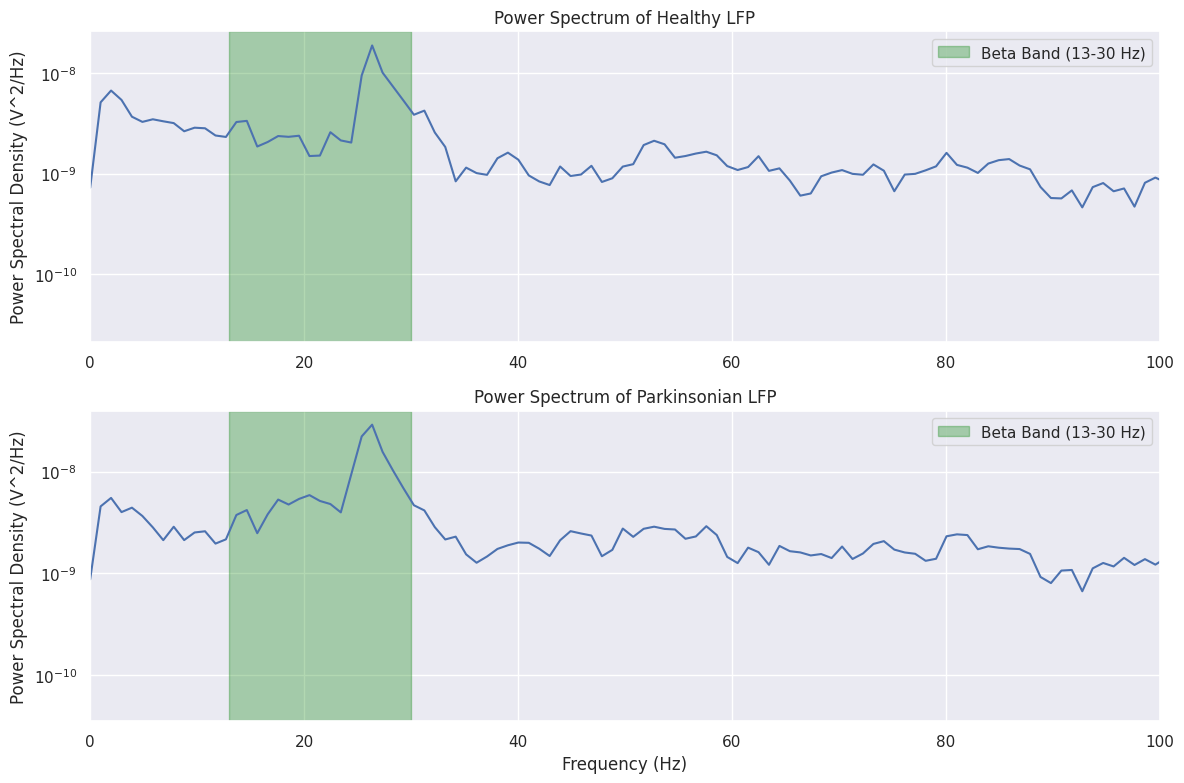

In [13]:
# Compute power spectrum for parkinsonian data
parkinsonian_f, parkinsonian_pxx = compute_psd(parkinsonian_lfp.data[0:30000], parkinsonian_lfp.rate)

# Plot power spectra for comparison
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.semilogy(f, pxx)
plt.title('Power Spectrum of Healthy LFP')
plt.ylabel('Power Spectral Density (V^2/Hz)')
plt.xlim(0, 100)
plt.axvspan(13, 30, alpha=0.3, color='green', label='Beta Band (13-30 Hz)')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.semilogy(parkinsonian_f, parkinsonian_pxx)
plt.title('Power Spectrum of Parkinsonian LFP')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (V^2/Hz)')
plt.xlim(0, 100)
plt.axvspan(13, 30, alpha=0.3, color='green', label='Beta Band (13-30 Hz)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Exploring Beta Band Voltage Data

Now let's examine the Beta Average Rectified Voltage (ARV) data, which is a key component of this dataset:

In [14]:
# Load a healthy beta file
healthy_beta_url = "https://api.dandiarchive.org/api/assets/b344c8b7-422f-46bb-b016-b47dc1e87c65/download/"
healthy_beta_remote_file = remfile.File(healthy_beta_url)
healthy_beta_h5_file = h5py.File(healthy_beta_remote_file)
healthy_beta_io = pynwb.NWBHDF5IO(file=healthy_beta_h5_file)
healthy_beta_nwb = healthy_beta_io.read()

# Load a parkinsonian beta file
parkinsonian_beta_url = "https://api.dandiarchive.org/api/assets/6b17c99d-19b9-4846-b1c9-671d9b187149/download/"
parkinsonian_beta_remote_file = remfile.File(parkinsonian_beta_url)
parkinsonian_beta_h5_file = h5py.File(parkinsonian_beta_remote_file)
parkinsonian_beta_io = pynwb.NWBHDF5IO(file=parkinsonian_beta_h5_file)
parkinsonian_beta_nwb = parkinsonian_beta_io.read()

### Accessing Beta Band Data

In [15]:
# Get Beta Band Voltage data from both files
healthy_beta = healthy_beta_nwb.processing["ecephys"]["LFP"]["Beta_Band_Voltage"]
parkinsonian_beta = parkinsonian_beta_nwb.processing["ecephys"]["LFP"]["Beta_Band_Voltage"]

# Print basic information
print(f"Healthy Beta - Data shape: {healthy_beta.data.shape}")
print(f"Parkinsonian Beta - Data shape: {parkinsonian_beta.data.shape}")

# Get timestamps
healthy_timestamps = healthy_beta.timestamps[:]
parkinsonian_timestamps = parkinsonian_beta.timestamps[:]

print(f"Duration of healthy beta signal: {healthy_timestamps[-1] - healthy_timestamps[0]:.2f} seconds")
print(f"Duration of parkinsonian beta signal: {parkinsonian_timestamps[-1] - parkinsonian_timestamps[0]:.2f} seconds")

Healthy Beta - Data shape: (1400,)
Parkinsonian Beta - Data shape: (1400,)
Duration of healthy beta signal: 27.98 seconds
Duration of parkinsonian beta signal: 27.98 seconds


### Visualizing Beta Band Data

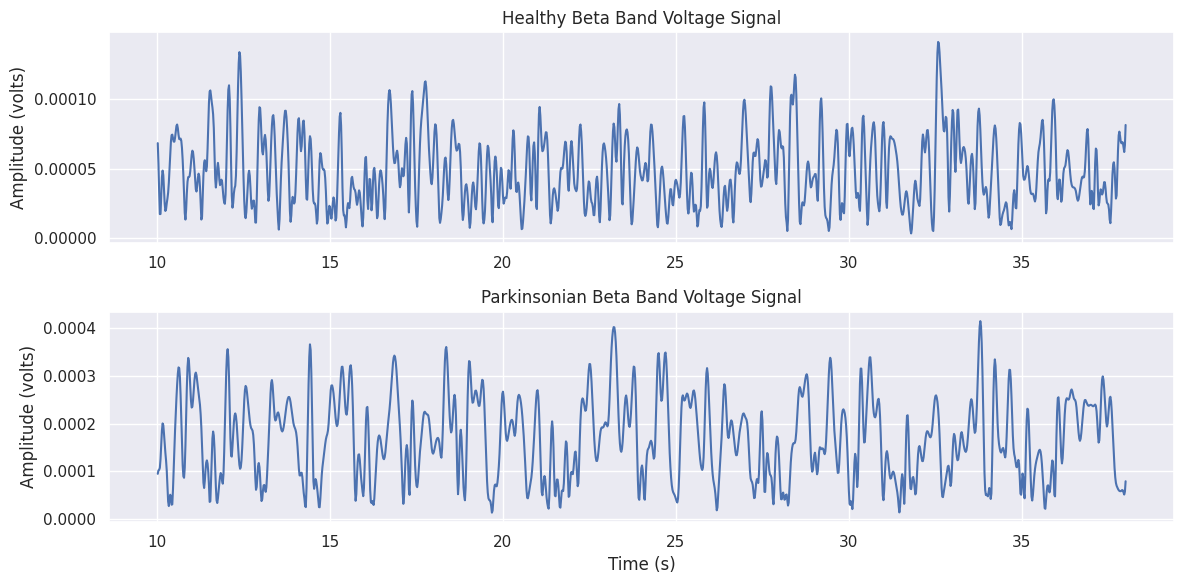

In [16]:
# Plot Beta Band Voltage data
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(healthy_timestamps, healthy_beta.data[:])
plt.title('Healthy Beta Band Voltage Signal')
plt.ylabel(f'Amplitude ({healthy_beta.unit})')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(parkinsonian_timestamps, parkinsonian_beta.data[:])
plt.title('Parkinsonian Beta Band Voltage Signal')
plt.xlabel('Time (s)')
plt.ylabel(f'Amplitude ({parkinsonian_beta.unit})')
plt.grid(True)

plt.tight_layout()
plt.show()

### Beta Band Statistical Comparison

In [17]:
# Calculate basic statistics
healthy_beta_data = healthy_beta.data[:]
parkinsonian_beta_data = parkinsonian_beta.data[:]

stats_df = pd.DataFrame({
    'Metric': ['Mean', 'Standard Deviation', 'Minimum', 'Maximum'],
    'Healthy Beta': [
        np.mean(healthy_beta_data),
        np.std(healthy_beta_data),
        np.min(healthy_beta_data),
        np.max(healthy_beta_data)
    ],
    'Parkinsonian Beta': [
        np.mean(parkinsonian_beta_data),
        np.std(parkinsonian_beta_data),
        np.min(parkinsonian_beta_data),
        np.max(parkinsonian_beta_data)
    ],
    'Ratio (Parkinsonian/Healthy)': [
        np.mean(parkinsonian_beta_data) / np.mean(healthy_beta_data),
        np.std(parkinsonian_beta_data) / np.std(healthy_beta_data),
        np.min(parkinsonian_beta_data) / np.min(healthy_beta_data),
        np.max(parkinsonian_beta_data) / np.max(healthy_beta_data)
    ]
})

print(stats_df)

               Metric  Healthy Beta  Parkinsonian Beta  \
0                Mean      0.000048           0.000168   
1  Standard Deviation      0.000025           0.000085   
2             Minimum      0.000004           0.000013   
3             Maximum      0.000141           0.000415   

   Ratio (Parkinsonian/Healthy)  
0                      3.493226  
1                      3.439653  
2                      3.591916  
3                      2.951573  


### Visualizing Amplitude Distributions

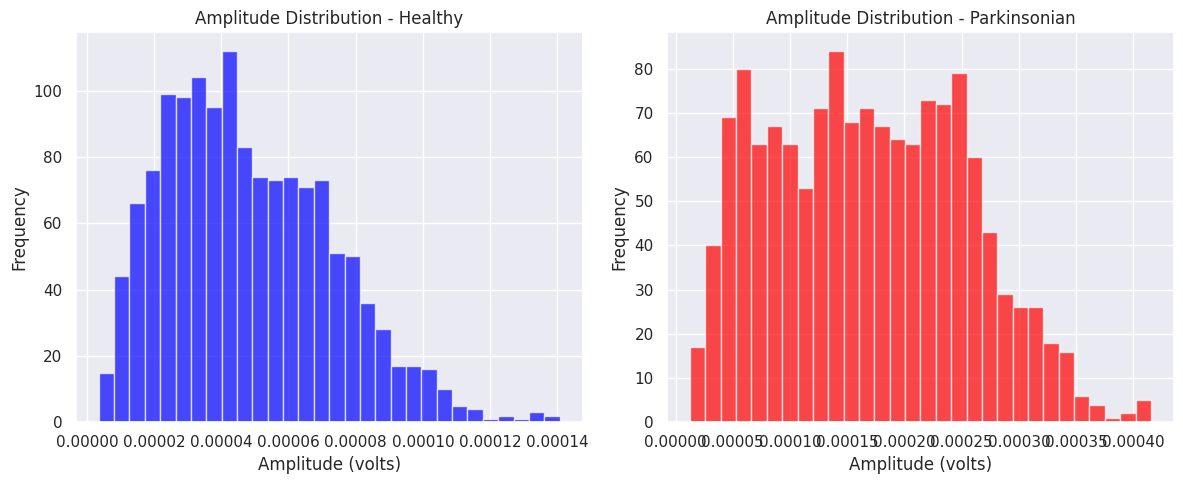

In [18]:
# Plot amplitude distributions as histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(healthy_beta_data, bins=30, alpha=0.7, color='blue')
plt.title('Amplitude Distribution - Healthy')
plt.xlabel(f'Amplitude ({healthy_beta.unit})')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(parkinsonian_beta_data, bins=30, alpha=0.7, color='red')
plt.title('Amplitude Distribution - Parkinsonian')
plt.xlabel(f'Amplitude ({parkinsonian_beta.unit})')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

### Beta Band Power Comparison

Healthy Beta Power: 2.926724e-09
Parkinsonian Beta Power: 3.548729e-08
Ratio (Parkinsonian/Healthy): 12.13


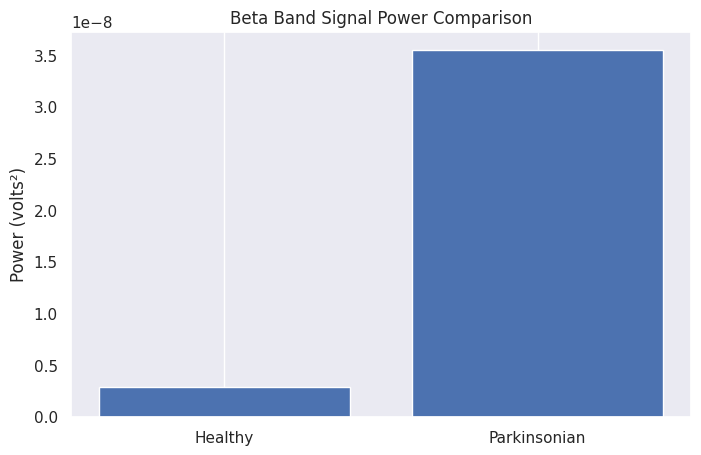

In [19]:
# Calculate power
healthy_power = np.sum(healthy_beta_data**2) / len(healthy_beta_data)
parkinsonian_power = np.sum(parkinsonian_beta_data**2) / len(parkinsonian_beta_data)

print(f"Healthy Beta Power: {healthy_power:.6e}")
print(f"Parkinsonian Beta Power: {parkinsonian_power:.6e}")
print(f"Ratio (Parkinsonian/Healthy): {parkinsonian_power/healthy_power:.2f}")

# Create a bar chart comparing beta power
plt.figure(figsize=(8, 5))
plt.bar(['Healthy', 'Parkinsonian'], [healthy_power, parkinsonian_power])
plt.title('Beta Band Signal Power Comparison')
plt.ylabel(f'Power ({healthy_beta.unit}²)')
plt.grid(axis='y')
plt.show()

### Normalized Signal Comparison

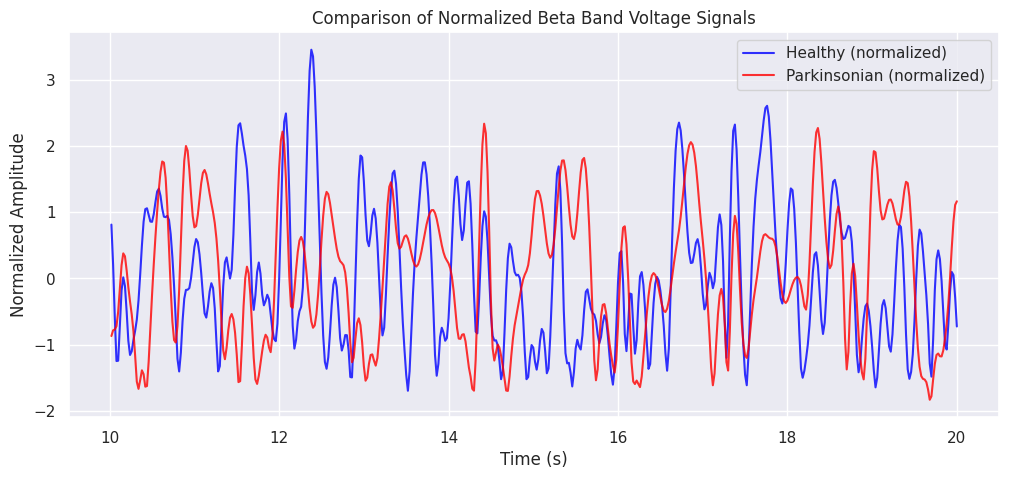

In [20]:
# Normalize the beta signals for direct comparison
healthy_beta_norm = (healthy_beta_data - np.mean(healthy_beta_data)) / np.std(healthy_beta_data)
parkinsonian_beta_norm = (parkinsonian_beta_data - np.mean(parkinsonian_beta_data)) / np.std(parkinsonian_beta_data)

# Plot a section of the normalized signals
section_size = 500  # First ~10 seconds for clearer visualization
plt.figure(figsize=(12, 5))
plt.plot(healthy_timestamps[:section_size], healthy_beta_norm[:section_size], 
         label='Healthy (normalized)', color='blue', alpha=0.8)
plt.plot(parkinsonian_timestamps[:section_size], parkinsonian_beta_norm[:section_size], 
         label='Parkinsonian (normalized)', color='red', alpha=0.8)
plt.title('Comparison of Normalized Beta Band Voltage Signals')
plt.xlabel('Time (s)')
plt.ylabel('Normalized Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## Exploring Neurosift

You can explore this NWB file interactively on Neurosift using the following link:

[View on Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/6b17c99d-19b9-4846-b1c9-671d9b187149/download/&dandisetId=001333&dandisetVersion=0.250327.2220)

## Summary of Findings

Our exploration of the Parkinson's Electrophysiological Signal Dataset (PESD) has revealed several interesting characteristics:

1. **Beta band activity differences**: The most striking difference between healthy and parkinsonian data is in the beta band power. Parkinsonian beta band signals show approximately 12 times higher power than healthy signals, which aligns with the known pathophysiology of Parkinson's disease where enhanced beta oscillations in the subthalamic nucleus are considered a biomarker.

2. **Amplitude characteristics**: Parkinsonian beta signals have significantly higher amplitudes (approximately 3-4 times higher) than healthy subjects. This is evident in both the time domain signals and the amplitude distribution histograms.

3. **Signal patterns**: Even when normalized, the temporal patterns of beta band activity show differences between healthy and parkinsonian conditions, with parkinsonian signals exhibiting different oscillatory patterns.

4. **Dataset structure**: The dataset provides a comprehensive collection of simulated electrophysiological signals for both healthy and parkinsonian conditions, with two main data types (Beta ARV and LFP) for each condition.

These observations demonstrate the utility of this dataset for studying the electrophysiological characteristics of Parkinson's disease and potentially for developing algorithms for detection or classification of parkinsonian states.

## Possible Future Directions

Here are some potential avenues for further analysis with this dataset:

1. **Time-frequency analysis**: Apply wavelet transforms or other time-frequency analysis methods to examine how the spectral content of the signals evolves over time.

2. **Machine learning applications**: Develop classification algorithms to automatically distinguish between healthy and parkinsonian signals based on features extracted from the beta band or LFP data.

3. **Cross-session comparisons**: Compare data across different sessions to understand variability within healthy and parkinsonian groups.

4. **Neural network modeling**: Use the data to inform computational models of basal ganglia circuits in healthy and disease states.

5. **Closed-loop DBS algorithms**: As mentioned in the referenced publication, this dataset could be useful for developing and testing closed-loop Deep Brain Stimulation (DBS) control algorithms.